In [1]:
# 1. What is Boosting in Machine Learning?
# Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) 
# to create a strong predictive model. It sequentially trains models, giving more weight to misclassified 
# instances to improve performance.

# 2. How does Boosting differ from Bagging?
# - Boosting focuses on reducing bias by training weak learners sequentially, adjusting for errors at each step.
# - Bagging reduces variance by training multiple strong learners independently and averaging their predictions.

# 3. What is the key idea behind AdaBoost?
# Adaptive Boosting (AdaBoost) assigns higher weights to misclassified instances and trains weak learners sequentially. 
# The final model is a weighted sum of these learners.

# 4. Explain the working of AdaBoost with an example.
# Example: Given a dataset, AdaBoost starts with equal weights for all samples. A weak learner (e.g., decision stump) 
# is trained, and misclassified points get higher weights. The next weak learner focuses on these misclassified points. 
# This process continues iteratively, and the final model combines all weak learners.

# 5. What is Gradient Boosting, and how is it different from AdaBoost?
# Gradient Boosting builds models sequentially, optimizing the loss function by correcting residual errors. 
# Unlike AdaBoost, which adjusts sample weights, Gradient Boosting uses gradients of the loss function to train new models.

# 6. What is the loss function in Gradient Boosting?
# The loss function depends on the task:
# - Regression: Mean Squared Error (MSE)
# - Classification: Log Loss (Cross-Entropy)

# 7. How does XGBoost improve over traditional Gradient Boosting?
# XGBoost enhances Gradient Boosting with:
# - Regularization (L1, L2) for better generalization
# - Parallel processing for speed improvement
# - Tree pruning to prevent overfitting
# - Handling missing values efficiently

# 8. What is the difference between XGBoost and CatBoost?
# - XGBoost: Optimized for speed and scalability, requires encoding categorical features.
# - CatBoost: Handles categorical features natively, reducing preprocessing steps and improving performance on categorical data.

# 9. What are some real-world applications of Boosting techniques?
# - Fraud detection in banking
# - Customer churn prediction
# - Medical diagnosis
# - Sentiment analysis
# - Recommendation systems

# 10. How does regularization help in XGBoost?
# Regularization (L1 & L2) prevents overfitting by penalizing complex trees, improving generalization.

# 11. What are some hyperparameters to tune in Gradient Boosting models?
# - Learning rate (controls step size)
# - Number of estimators (number of trees)
# - Max depth (tree depth)
# - Subsample (fraction of data used)
# - Min child weight (minimum instances per leaf)

# 12. What is the concept of Feature Importance in Boosting?
# Feature importance measures how useful a feature is in making predictions. Boosting models provide importance scores, 
# helping in feature selection.

# 13. Why is CatBoost efficient for categorical data?
# CatBoost efficiently handles categorical data using an advanced encoding technique (ordered boosting) 
# that prevents overfitting and preserves information.


In [7]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 14.⁠ ⁠Train an AdaBoost Classifier on a sample dataset and print model accuracy.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# output:Model Accuracy: 0.83

Model Accuracy: 0.83


In [3]:
# 15.⁠ ⁠Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE).

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the AdaBoost Regressor
model = AdaBoostRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# output:Mean Absolute Error (MAE): 78.62

Mean Absolute Error (MAE): 78.62


In [4]:
# 16.⁠ ⁠Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print("Feature Importance:\n", importance_df)


Feature Importance:
                     Feature  Importance
7       mean concave points    0.450418
27     worst concave points    0.240209
20             worst radius    0.075262
22          worst perimeter    0.051441
21            worst texture    0.039881
23               worst area    0.038200
1              mean texture    0.027821
26          worst concavity    0.017576
16          concavity error    0.012860
13               area error    0.010848
10             radius error    0.005238
24         worst smoothness    0.004811
19  fractal dimension error    0.004313
5          mean compactness    0.003882
11            texture error    0.003488
15        compactness error    0.002644
17     concave points error    0.002072
4           mean smoothness    0.002039
28           worst symmetry    0.001500
6            mean concavity    0.001144
25        worst compactness    0.000891
18           symmetry error    0.000709
14         smoothness error    0.000669
3                 m

In [5]:
# 17.⁠ ⁠Train a Gradient Boosting Regressor and evaluate using R-Squared Score.

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

# Generate a sample regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print R-Squared Score
r2 = r2_score(y_test, y_pred)
print(f"R-Squared Score: {r2:.2f}")
# output:R-Squared Score: 0.92

R-Squared Score: 0.92


In [8]:
# 18.⁠ ⁠Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

# Train an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Print accuracy comparison
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")

# output:
# Gradient Boosting Accuracy: 0.91
# XGBoost Accuracy: 0.92

Gradient Boosting Accuracy: 0.91
XGBoost Accuracy: 0.92


In [9]:
# 19.⁠ ⁠Train a CatBoost Classifier and evaluate using Fl-Score.
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the CatBoost Classifier
model = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.2f}")
# output:F1-Score: 0.94

F1-Score: 0.94


In [10]:
# 20.⁠ ⁠Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE).
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# output: Mean Squared Error (MSE): 5530.47

Mean Squared Error (MSE): 5530.47


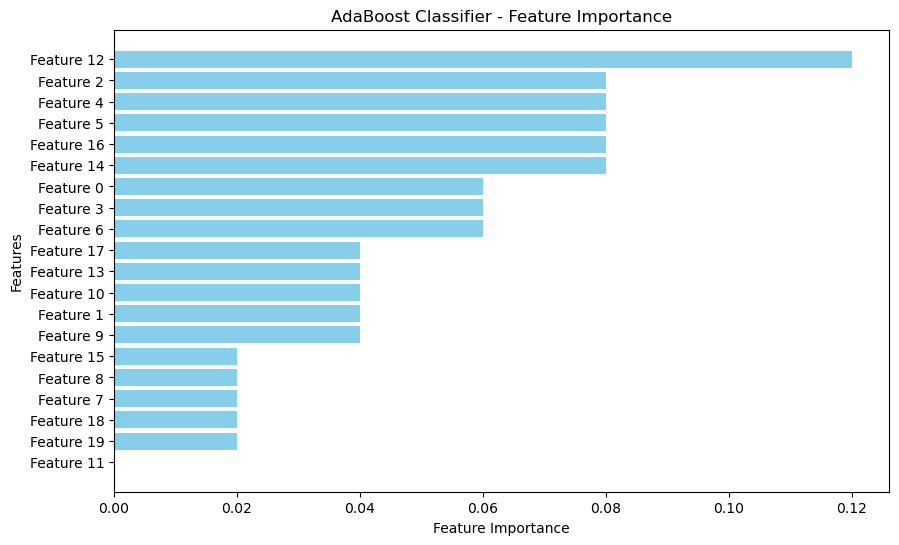

In [11]:
# 21.⁠ ⁠Train an AdaBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': [f'Feature {i}' for i in range(X.shape[1])], 
                              'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("AdaBoost Classifier - Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


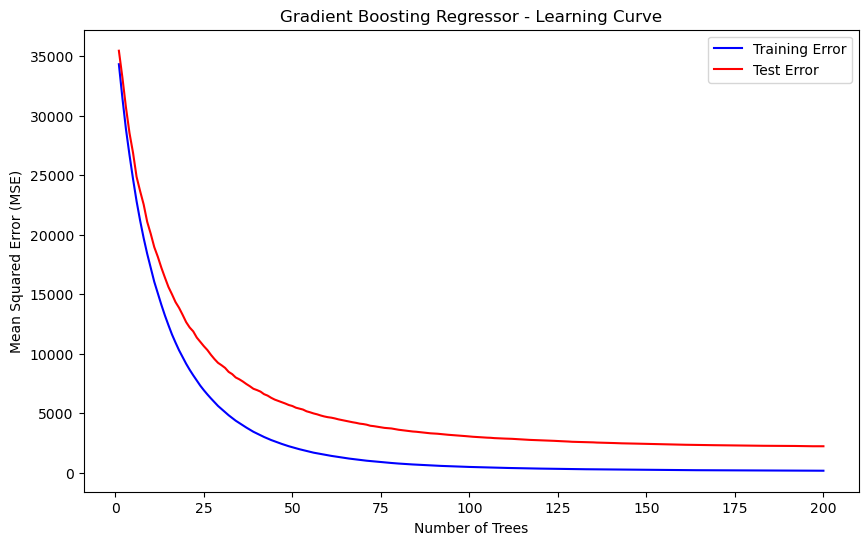

In [14]:
# 22.⁠ ⁠Train a Gradient Boosting Regressor and plot learning curves.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)  # Model is now fitted

# Arrays to store training and test errors
train_errors, test_errors = [], []

# Track performance at each iteration using staged_predict
for y_train_pred, y_test_pred in zip(model.staged_predict(X_train), model.staged_predict(X_test)):
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(train_errors) + 1), train_errors, label="Training Error", color='blue')
plt.plot(np.arange(1, len(test_errors) + 1), test_errors, label="Test Error", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Gradient Boosting Regressor - Learning Curve")
plt.legend()
plt.show()


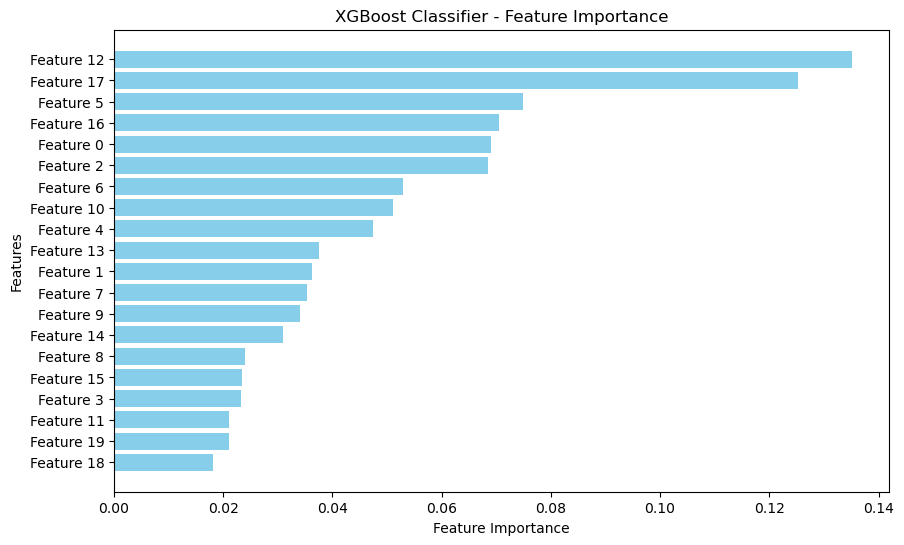

In [15]:
# 23.⁠ ⁠Train an XGBoost Classifier and visualize feature importance.

import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Classifier
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({'Feature': [f'Feature {i}' for i in range(X.shape[1])], 
                              'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Classifier - Feature Importance")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()


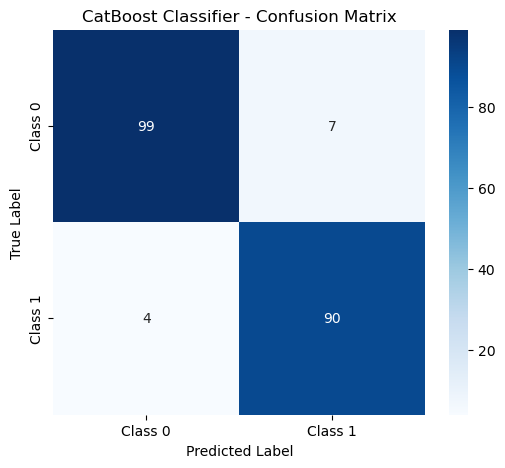

In [16]:
# 24.⁠ ⁠Train a CatBoost Classifier and plot the confusion matrix.

import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a CatBoost Classifier
model = CatBoostClassifier(iterations=100, verbose=0, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("CatBoost Classifier - Confusion Matrix")
plt.show()


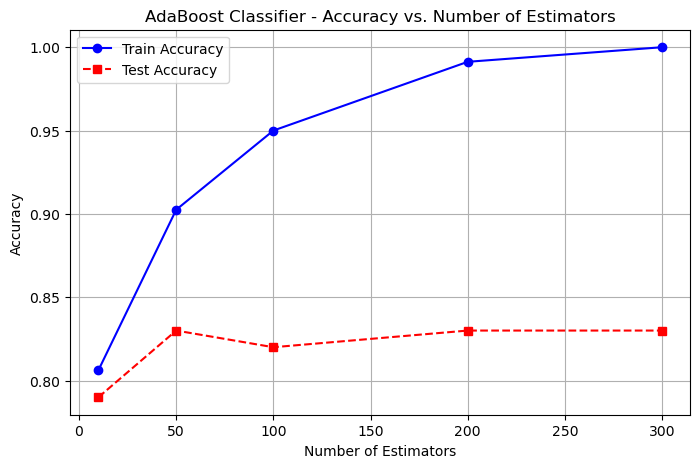

In [17]:
# 25.⁠ ⁠Train an AdaBoost Classifier with different numbers of estimators and compare accuracy.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different numbers of estimators to test
n_estimators_list = [10, 50, 100, 200, 300]
train_accuracies = []
test_accuracies = []

# Train AdaBoost with different estimators and evaluate accuracy
for n in n_estimators_list:
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_list, train_accuracies, marker='o', linestyle='-', label="Train Accuracy", color='blue')
plt.plot(n_estimators_list, test_accuracies, marker='s', linestyle='--', label="Test Accuracy", color='red')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier - Accuracy vs. Number of Estimators")
plt.legend()
plt.grid(True)
plt.show()


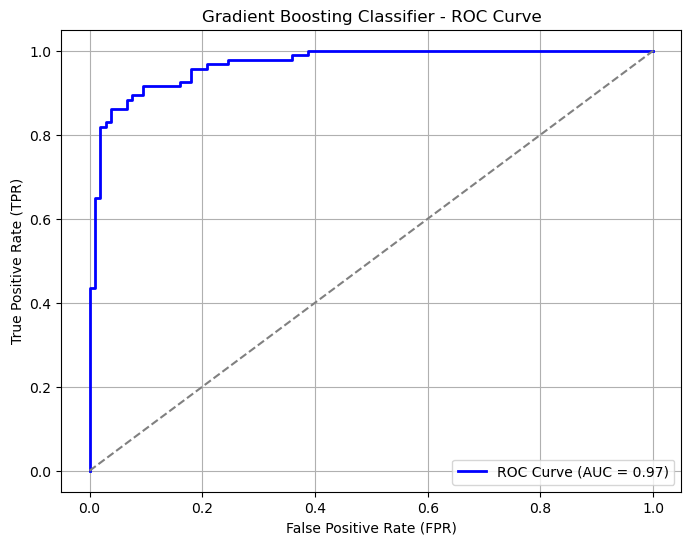

In [18]:
# 26.⁠ ⁠Train a Gradient Boosting Classifier and visualize the ROC curve.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle="--")  # Random classifier line
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Gradient Boosting Classifier - ROC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [19]:
# 27.⁠ ⁠Train an XGBoost Regressor and tune the learning rate using GridSearchCV.

import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

# Generate a synthetic regression dataset
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost Regressor
model = XGBRegressor(n_estimators=100, random_state=42)

# Define the grid of hyperparameters to search
param_grid = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)

# Print results
print(f"Best Learning Rate: {grid_search.best_params_['learning_rate']}")
print(f"Mean Squared Error (MSE) on Test Set: {mse:.4f}")

# output:
# Fitting 5 folds for each of 5 candidates, totalling 25 fits
# Best Learning Rate: 0.1
# Mean Squared Error (MSE) on Test Set: 4845.6934

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Learning Rate: 0.1
Mean Squared Error (MSE) on Test Set: 4845.6934


F1-Score without Class Weights: 0.6000
F1-Score with Class Weights: 0.6364


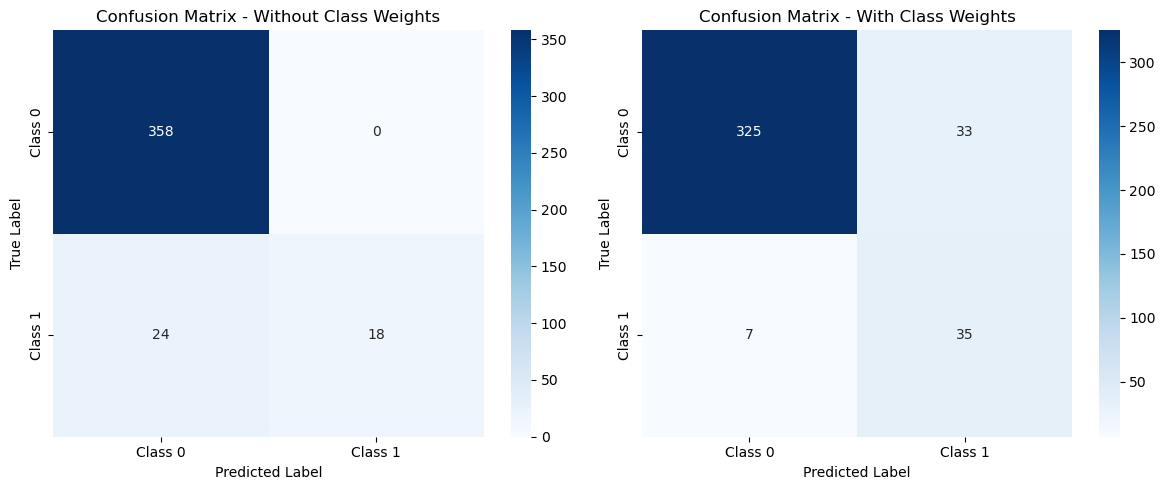

In [21]:
# 28.⁠ ⁠Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score, confusion_matrix

# Generate an imbalanced classification dataset
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15, 
                           n_redundant=5, weights=[0.9, 0.1], random_state=42)  # 90% class 0, 10% class 1

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train CatBoost without class weights
model_no_weights = CatBoostClassifier(iterations=200, verbose=0, random_state=42)
model_no_weights.fit(X_train, y_train)
y_pred_no_weights = model_no_weights.predict(X_test)
f1_no_weights = f1_score(y_test, y_pred_no_weights)

# Compute class weights
class_counts = np.bincount(y_train)
class_weights = {0: class_counts[1] / class_counts[0], 1: class_counts[0] / class_counts[1]}

# Train CatBoost with class weights
model_with_weights = CatBoostClassifier(iterations=200, class_weights=class_weights, verbose=0, random_state=42)
model_with_weights.fit(X_train, y_train)
y_pred_with_weights = model_with_weights.predict(X_test)
f1_with_weights = f1_score(y_test, y_pred_with_weights)

# Print F1-scores
print(f"F1-Score without Class Weights: {f1_no_weights:.4f}")
print(f"F1-Score with Class Weights: {f1_with_weights:.4f}")

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, y_pred, title in zip(axes, [y_pred_no_weights, y_pred_with_weights], 
                             ["Without Class Weights", "With Class Weights"]):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], 
                yticklabels=["Class 0", "Class 1"], ax=ax)
    ax.set_title(f"Confusion Matrix - {title}")
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()


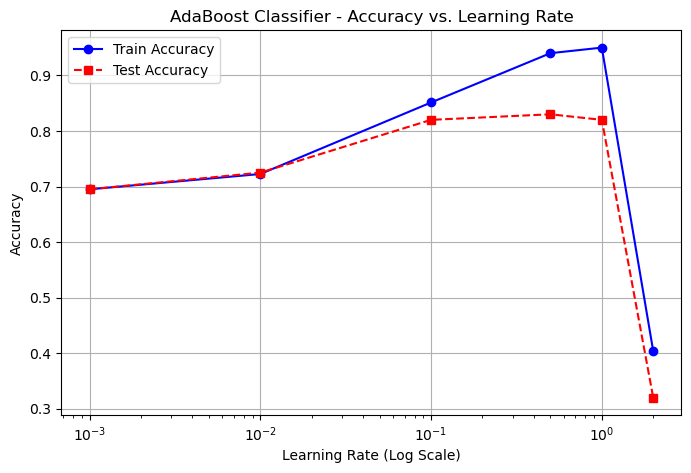

In [22]:
# 29.⁠ ⁠Train an AdaBoost Classifier and analyze the effect of different learning rates.

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, 
                           n_redundant=5, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
train_accuracies = []
test_accuracies = []

# Train AdaBoost with different learning rates and evaluate accuracy
for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot accuracy vs. learning rate
plt.figure(figsize=(8, 5))
plt.plot(learning_rates, train_accuracies, marker='o', linestyle='-', label="Train Accuracy", color='blue')
plt.plot(learning_rates, test_accuracies, marker='s', linestyle='--', label="Test Accuracy", color='red')
plt.xscale("log")  # Log scale for better visualization
plt.xlabel("Learning Rate (Log Scale)")
plt.ylabel("Accuracy")
plt.title("AdaBoost Classifier - Accuracy vs. Learning Rate")
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# 30.⁠ ⁠Train an XGBoost Classifier for multi-class classification and evaluate using log-loss.
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import log_loss

# Generate a synthetic multi-class dataset (3 classes)
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15, 
                           n_redundant=5, n_classes=3, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the XGBoost Classifier for multi-class classification
model = xgb.XGBClassifier(objective="multi:softprob", num_class=3, n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for log-loss calculation
y_pred_proba = model.predict_proba(X_test)

# Compute log-loss
loss = log_loss(y_test, y_pred_proba)

# Print the log-loss value
print(f"Log-Loss: {loss:.4f}")


Log-Loss: 0.4185
